In [1]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
x,y=mnist["data"],mnist["target"]
y.shape

(70000,)

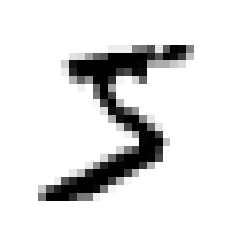

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit=x[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()

In [4]:
y[0]

'5'

In [10]:
import numpy as np
y=y.astype(np.uint8)
y[0]

5

In [11]:
xtrain,xtest,ytrain,ytest=x[:60000],x[60000:],y[:60000],y[60000:]

In [15]:
ytrain5=(ytrain==5)
ytest5=(ytest==5)


array([ True, False, False, ...,  True, False, False])

In [16]:
from sklearn.linear_model import SGDClassifier

sgdclf=SGDClassifier(random_state=42)
sgdclf.fit(xtrain,ytrain5)

SGDClassifier(random_state=42)

In [17]:
sgdclf.predict([some_digit])

array([ True])

In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgdclf,xtrain,ytrain5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [20]:
from sklearn.base import BaseEstimator

class never5classfier(BaseEstimator):
    def fit(self,x,y=None):
        return self
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)


In [21]:
never5clf=never5classfier()
cross_val_score(never5clf,xtrain,ytrain5,cv=3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [22]:
from sklearn.model_selection import cross_val_predict

ytrainpred=cross_val_predict(sgdclf,xtrain,ytrain5,cv=3)

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytrain5,ytrainpred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [25]:
from sklearn.metrics import precision_score,recall_score

precision_score(ytrain5,ytrainpred)


0.8370879772350012

In [26]:
recall_score(ytrain5,ytrainpred)

0.6511713705958311

In [27]:
from sklearn.metrics import f1_score

f1_score(ytrain5,ytrainpred)

0.7325171197343846

In [28]:
yscores=sgdclf.decision_function([some_digit])
yscores

array([2164.22030239])

In [30]:
threshold=0
ysomedigitpred=(yscores>threshold)
ysomedigitpred

array([ True])

In [31]:
threshold=8000
ysomedigitpred=(yscores>threshold)
ysomedigitpred

array([False])

In [32]:
yscores=cross_val_predict(sgdclf,xtrain,ytrain5,cv=3,method='decision_function')

In [33]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds=precision_recall_curve(ytrain5,yscores)

ValueError: x and y must have same first dimension, but have shapes (3908,) and (59966,)

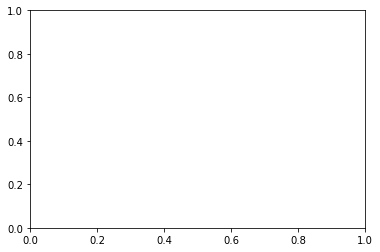

In [47]:
def plot_recall_threshold_graf(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],label='정밀도')
    plt.plot(thresholds,recalls[:-1],label='재현율')  
    [...]
plot_recall_threshold_graf(precisions,recalls,thresholds)
plt.show()

In [39]:
threshold90precision=thresholds[np.argmax(precisions>=0.90)]

In [40]:
ytrainpred90=(yscores>=threshold90precision)

precision_score(ytrain5,ytrainpred90)

0.9000345901072293

In [42]:
recall_score(ytrain5,ytrainpred90)

0.4799852425751706

In [44]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(ytrain5,yscores)


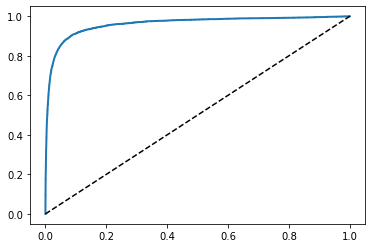

In [48]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(ytrain5,yscores)

0.9604938554008616

In [50]:
from sklearn.ensemble import RandomForestClassifier

forestclf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forestclf,xtrain,ytrain5,cv=3,method='predict_proba')

In [51]:
yscoresforest=y_probas_forest[:,1]
fpr_forest,tpr_forest,thresholds_forest=roc_curve(ytrain5,yscoresforest)

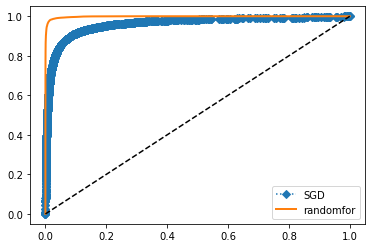

In [55]:
plt.plot(fpr,tpr,"D:",label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"randomfor")
plt.legend(loc="lower right")
plt.show()

In [56]:
roc_auc_score(ytrain5,yscoresforest)

0.9983436731328145